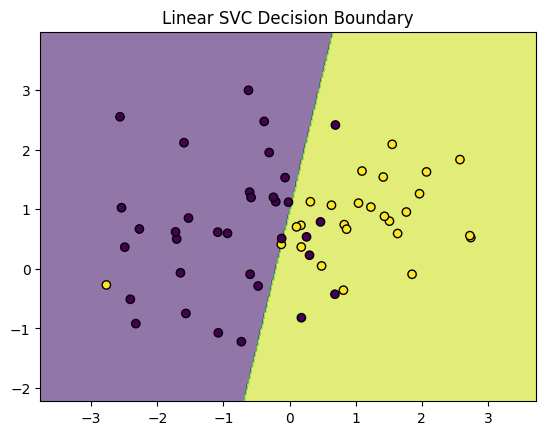

Linear SVC Accuracy: 0.8666666666666667


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear SVC
linear_svc = SVC(kernel='linear', C=1)
linear_svc.fit(X_train, y_train)

# Visualize
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svc, X_test, y_test, "Linear SVC Decision Boundary")
print("Linear SVC Accuracy:", accuracy_score(y_test, linear_svc.predict(X_test)))



Polynomial Kernel (degree=2) Accuracy: 0.6166666666666667


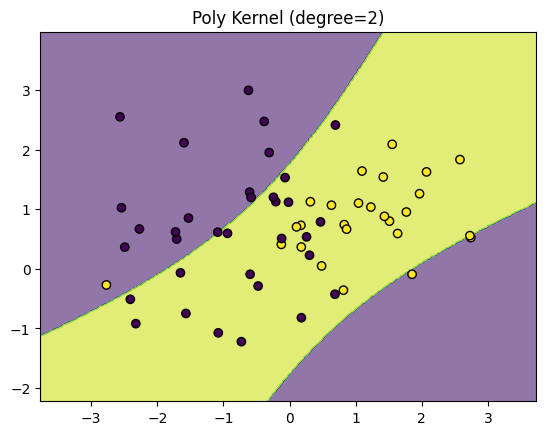


Polynomial Kernel (degree=3) Accuracy: 0.7333333333333333


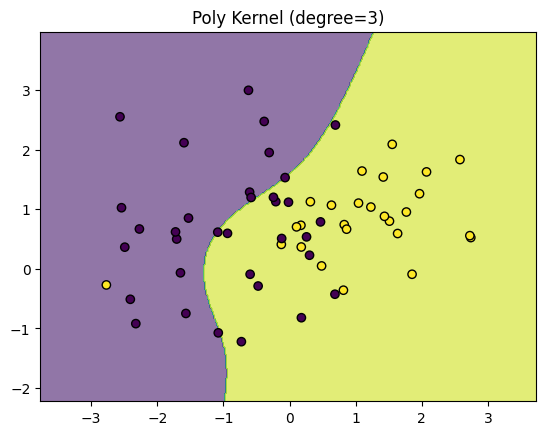


Polynomial Kernel (degree=5) Accuracy: 0.65


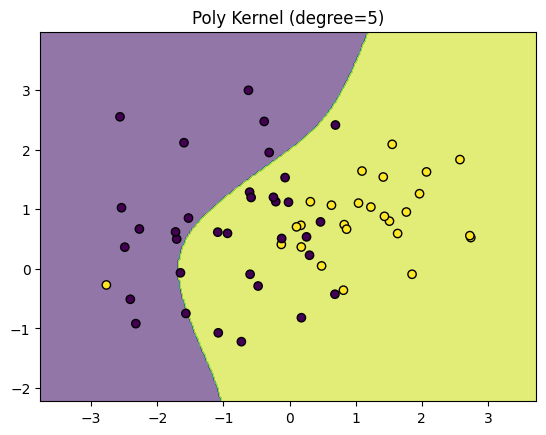


RBF Kernel Accuracy: 0.85


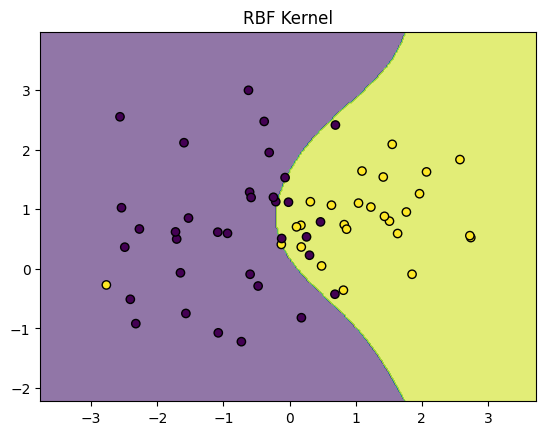

In [2]:
# Polynomial kernel (degrees 2, 3, 5)
for degree in [2, 3, 5]:
    poly_svc = SVC(kernel='poly', degree=degree, C=1)
    poly_svc.fit(X_train, y_train)
    print(f"\nPolynomial Kernel (degree={degree}) Accuracy:", accuracy_score(y_test, poly_svc.predict(X_test)))
    plot_decision_boundary(poly_svc, X_test, y_test, f"Poly Kernel (degree={degree})")

# RBF kernel
rbf_svc = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svc.fit(X_train, y_train)
print("\nRBF Kernel Accuracy:", accuracy_score(y_test, rbf_svc.predict(X_test)))
plot_decision_boundary(rbf_svc, X_test, y_test, "RBF Kernel")

RBF (C=0.1, gamma=scale) -> Accuracy: 0.85


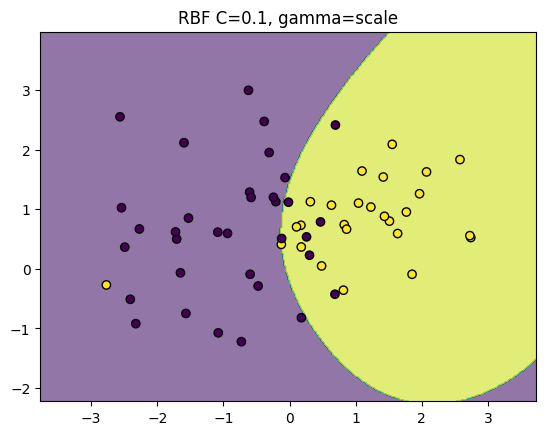

RBF (C=0.1, gamma=0.1) -> Accuracy: 0.87


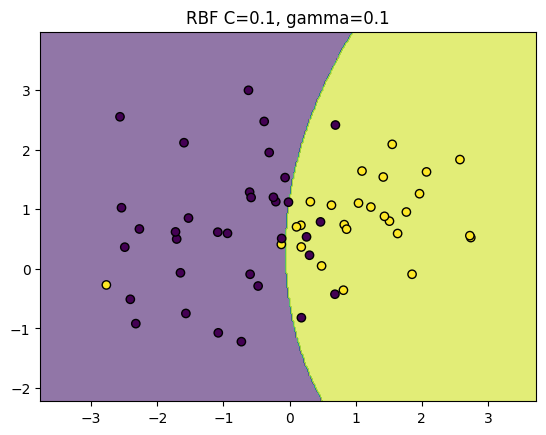

RBF (C=0.1, gamma=1) -> Accuracy: 0.85


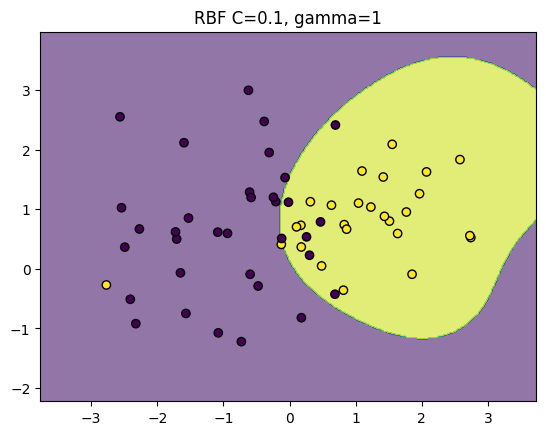

RBF (C=1, gamma=scale) -> Accuracy: 0.85


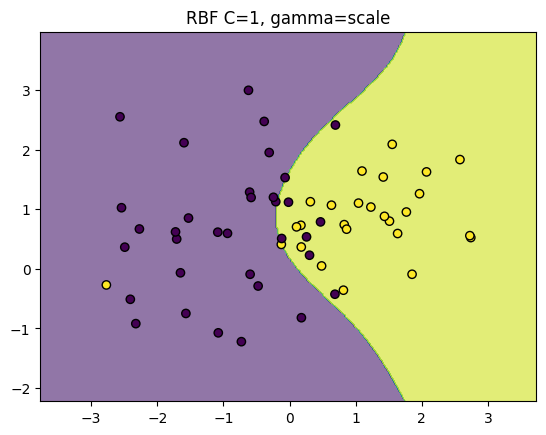

RBF (C=1, gamma=0.1) -> Accuracy: 0.85


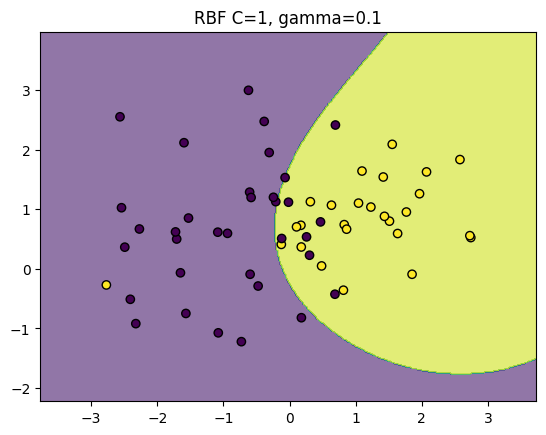

RBF (C=1, gamma=1) -> Accuracy: 0.88


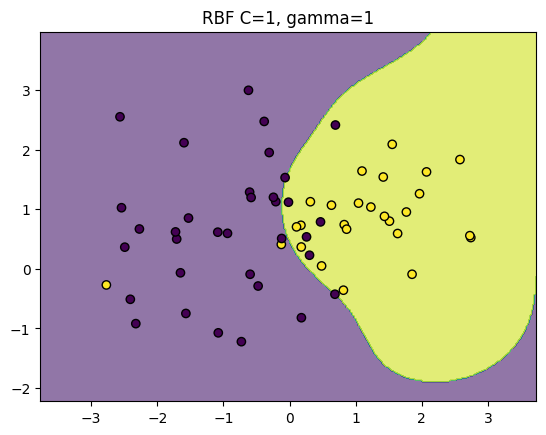

RBF (C=10, gamma=scale) -> Accuracy: 0.88


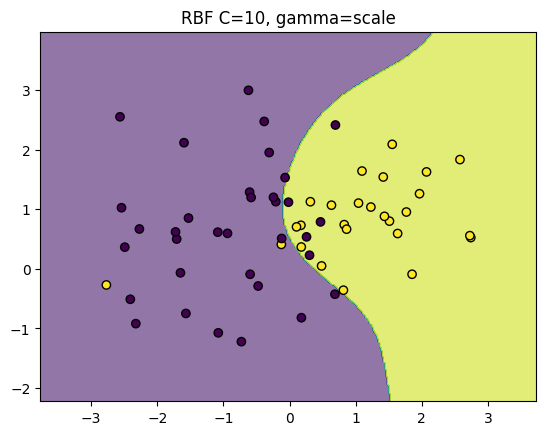

RBF (C=10, gamma=0.1) -> Accuracy: 0.85


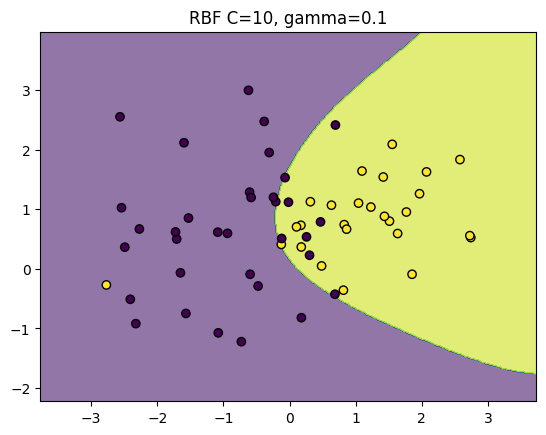

RBF (C=10, gamma=1) -> Accuracy: 0.85


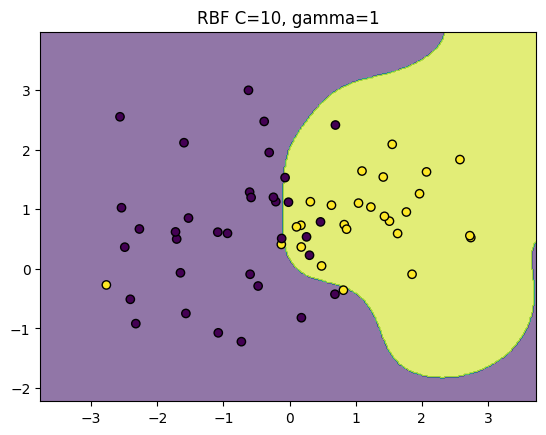

In [3]:
for C_val in [0.1, 1, 10]:
    for gamma_val in ['scale', 0.1, 1]:
        svc = SVC(kernel='rbf', C=C_val, gamma=gamma_val)
        svc.fit(X_train, y_train)
        acc = accuracy_score(y_test, svc.predict(X_test))
        print(f"RBF (C={C_val}, gamma={gamma_val}) -> Accuracy: {acc:.2f}")
        plot_decision_boundary(svc, X_test, y_test, f"RBF C={C_val}, gamma={gamma_val}")